<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/Multilinear_Regression_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [10]:
df=pd.read_csv('/content/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
df.info() #columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
import seaborn as sns
import statsmodels.formula.api as smf
df.isna().sum()  # checking for missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


**Correlation Matrix**

Check for Assumption: Independent variables are independent of each other

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**Scatterplot between variables along with histograms**

Check for Assumption: Independent variables are independent of each other

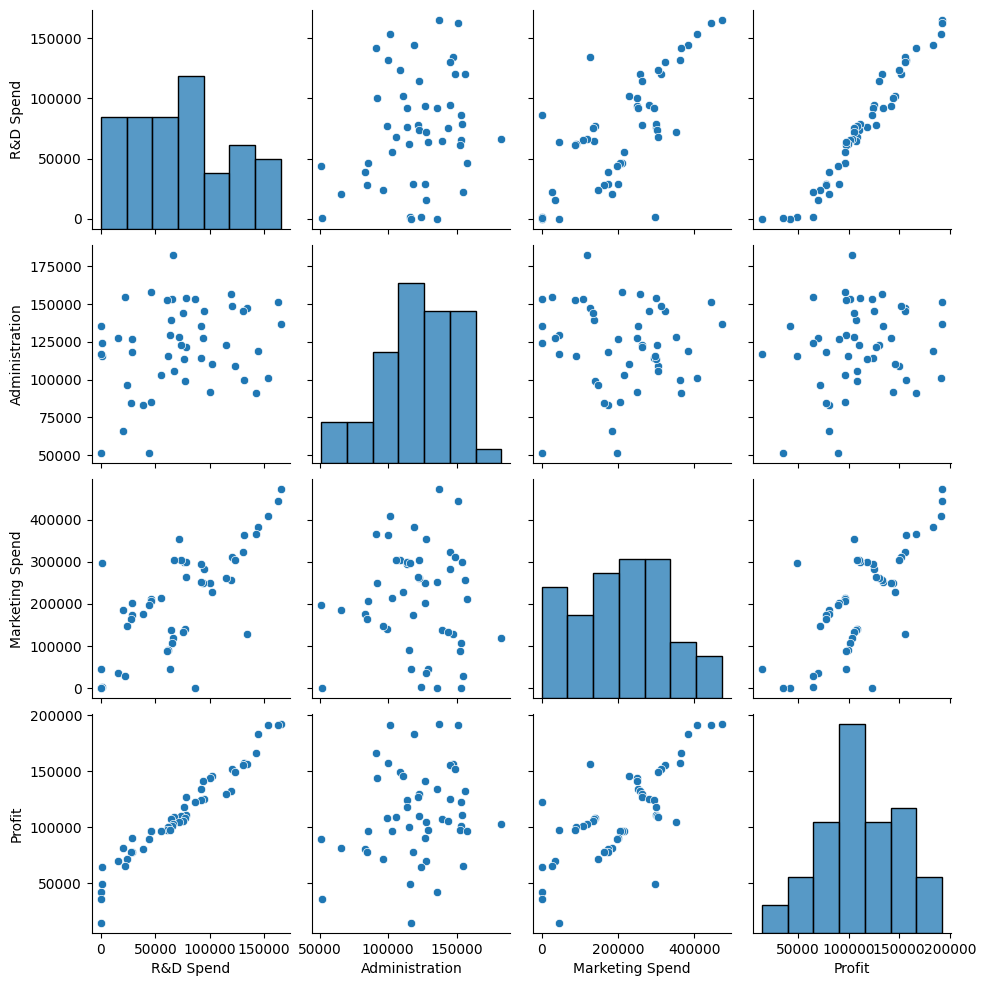

In [14]:
#Format the plot background and scatter plots for all the variables
sns.set_style()
sns.pairplot(df)

In [15]:
df=df.rename({'R&D Spend':'RND','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)
df  # Rename column name

,RND,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [16]:
df.describe()


,RND,Admin,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [17]:
df[df.duplicated()]

,RND,Admin,Marketing,State,Profit


# **Preparing a model**

In [19]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
Model = smf.ols("Profit~RND+Admin+Marketing",data=df).fit()

In [20]:
Model.params

Intercept    50122.192990
RND              0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [21]:
# Finding tvalues and pvalues
Model.tvalues , np.round(Model.pvalues,5)

(Intercept     7.626218
 RND          17.846374
 Admin        -0.525507
 Marketing     1.655077
 dtype: float64,
 Intercept    0.00000
 RND          0.00000
 Admin        0.60176
 Marketing    0.10472
 dtype: float64)

In [66]:
# Finding rsquared values
Model.rsquared , Model.rsquared_adj ,Model.aic ##R squared value tells us how good model is.Model acuracy is 95%.

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055)

In [23]:
# Build SLR and MLR models for insignificant variables 'Admin' and 'marketing_spend'
# Also find their tvalues and pvalues
slr_a=smf.ols("Profit~Admin",data=df).fit()
slr_a.tvalues , slr_a.pvalues  # Admin has in-significant pvalue

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [25]:
slr_m=smf.ols("Profit~Marketing",data=df).fit()
slr_m.tvalues , slr_m.pvalues  # Markiting Spend has significant pvalue

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

In [26]:
slr_a=smf.ols("Profit~RND",data=df).fit()
slr_a.tvalues , slr_a.pvalues  # RND has significant pvalue

(Intercept    19.320288
 RND          29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RND          3.500322e-32
 dtype: float64)

# 1) Collinearity Problem Check Calculate VIF = 1/(1-Rsquare) for all independent variables

In [27]:


rsq_r=smf.ols("RND~Admin+Marketing",data=df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Admin~RND+Marketing",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Marketing~RND+Admin",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RND','Admin','Marketing'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RND,2.468903
1,Admin,1.175091
2,Marketing,2.326773


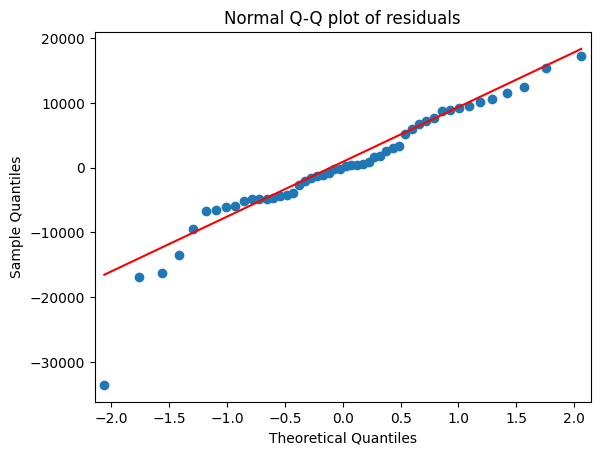

In [28]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(Model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
# to print index of values whose y value is less than 30000
list(np.where(Model.resid<30000))

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])]

# Residual Plot for Homoscedasticity: Constant Variance

In [31]:
# Function definition for standardization i.e. z score, Function name: get_standardized_values
def get_stand_values( vals ):
    return (vals - vals.mean())/vals.std() # This is z score = (Xi - mean)/std. dev.

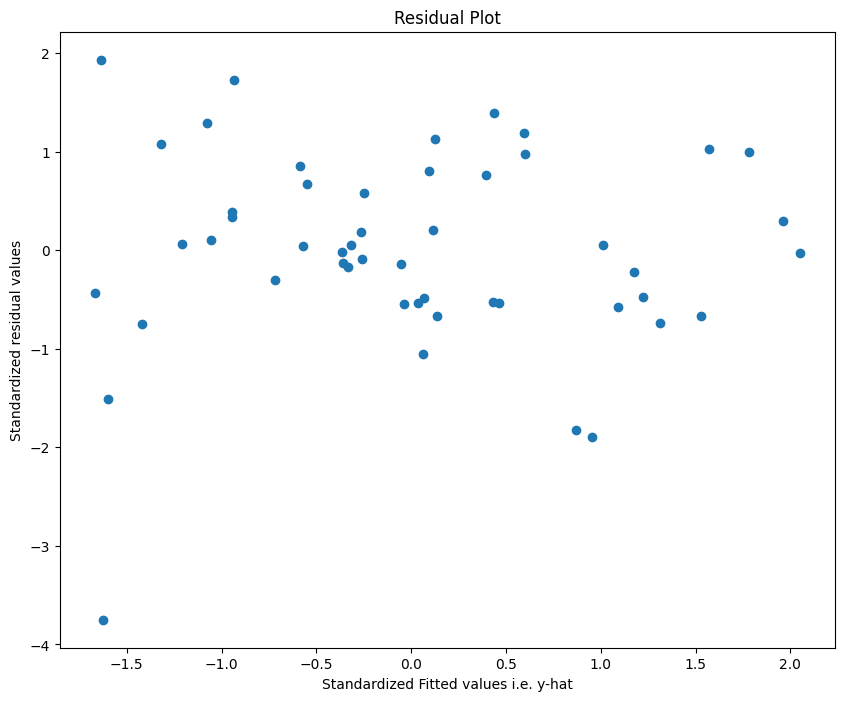

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(get_stand_values(Model.fittedvalues), # fittedvalue is y hat.,model.resid is error
            get_stand_values(Model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values i.e. y-hat')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors



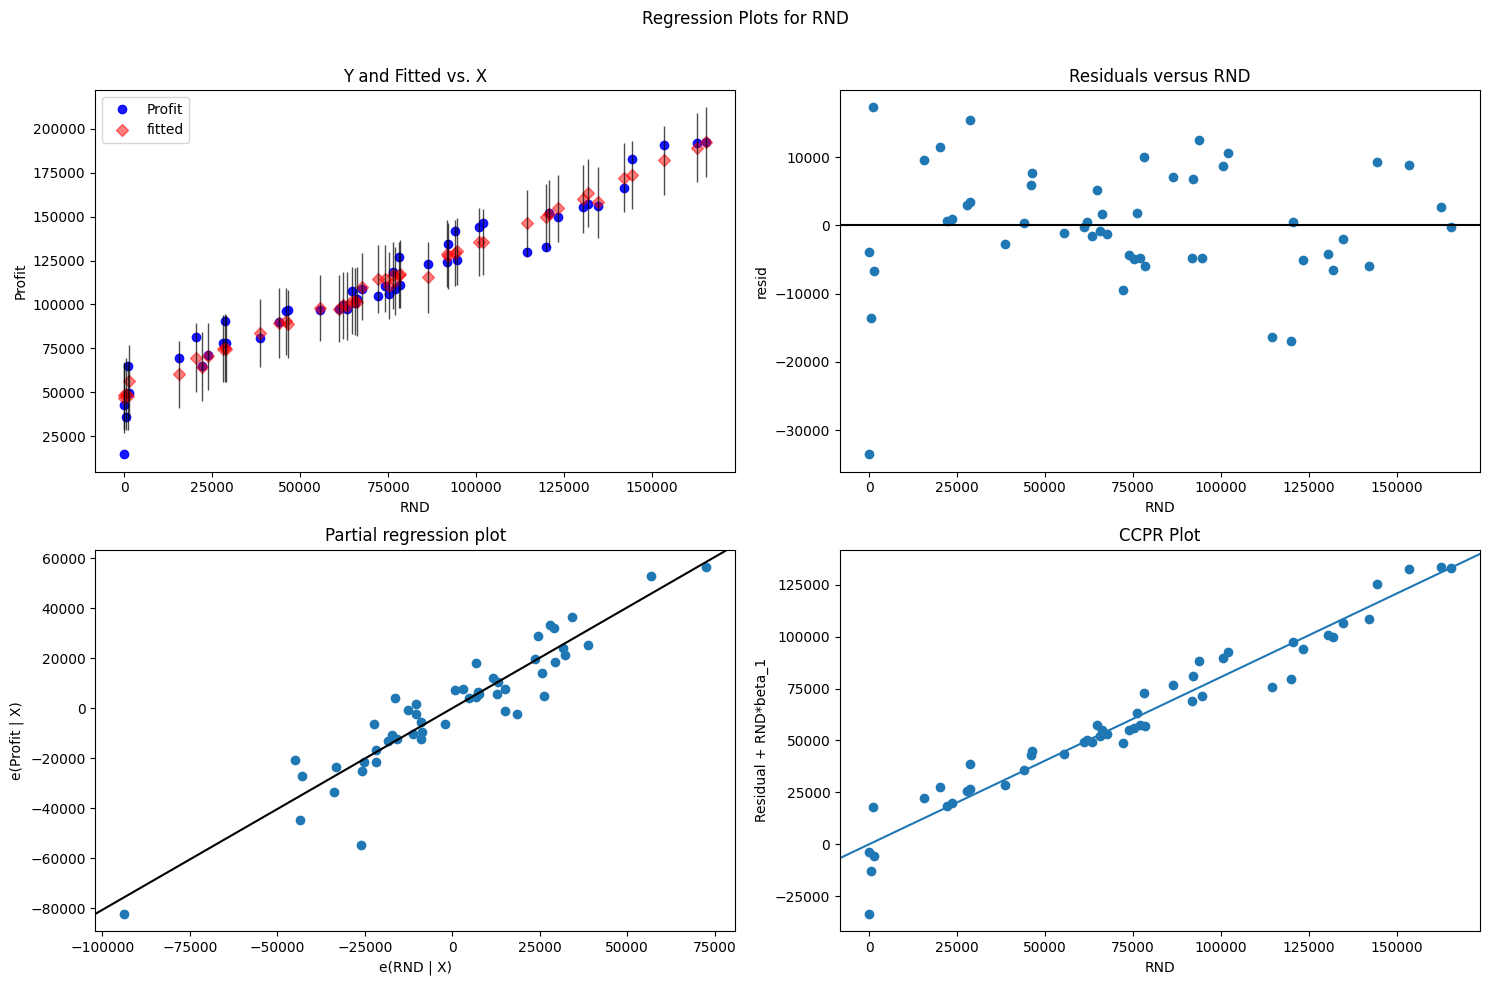

In [33]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model, "RND", fig=fig)
plt.show()

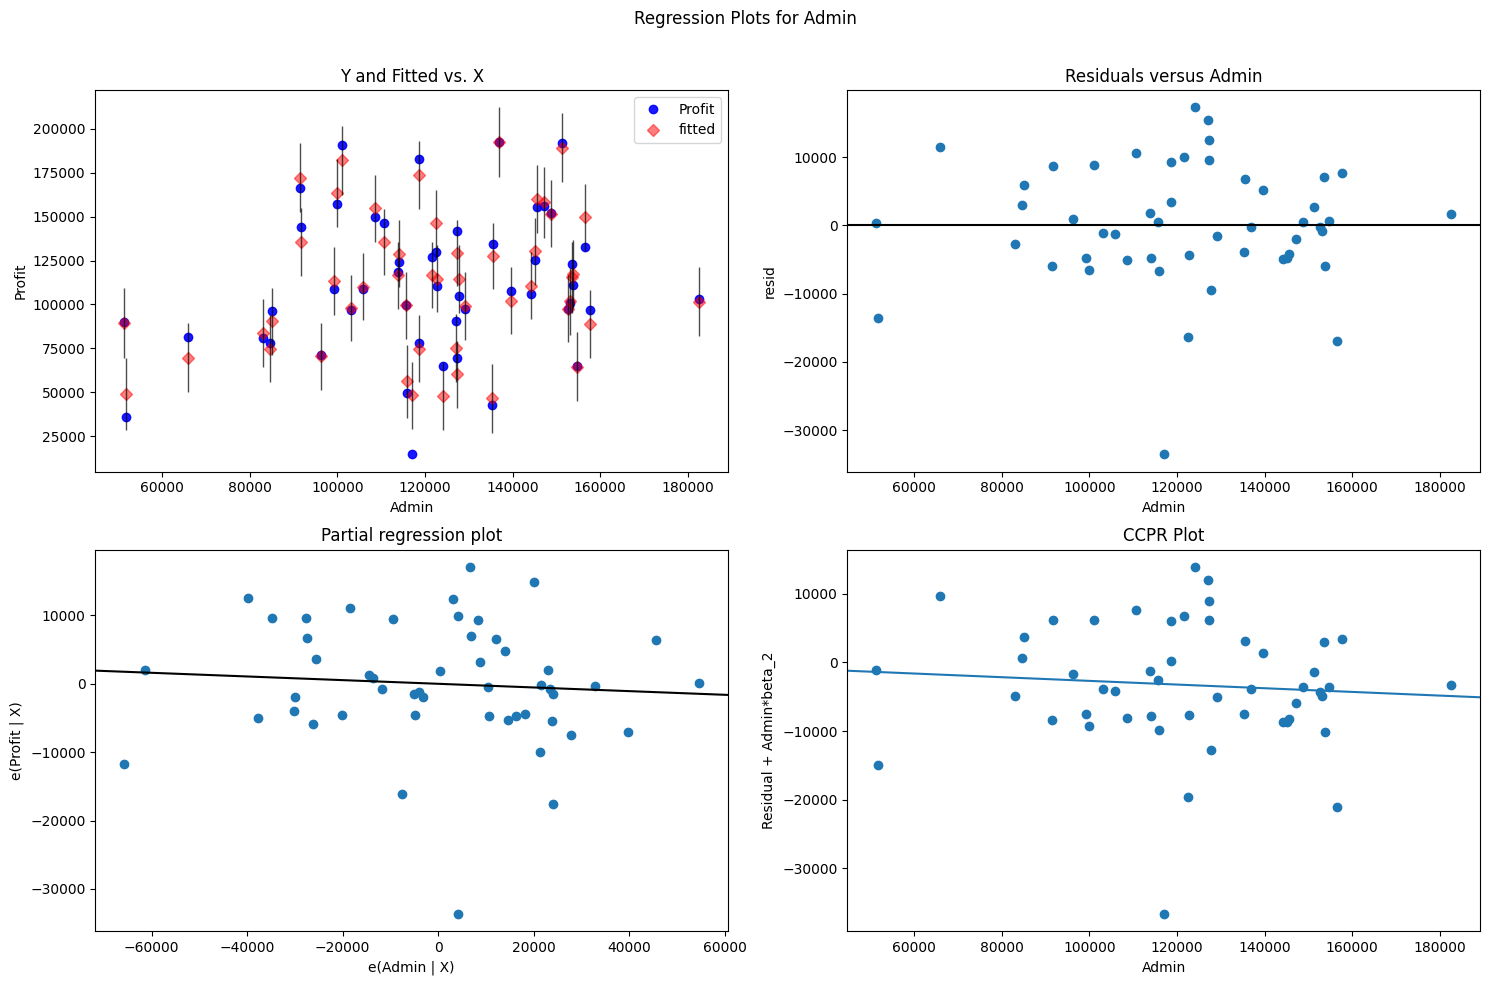

In [35]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model, "Admin", fig=fig)
plt.show()

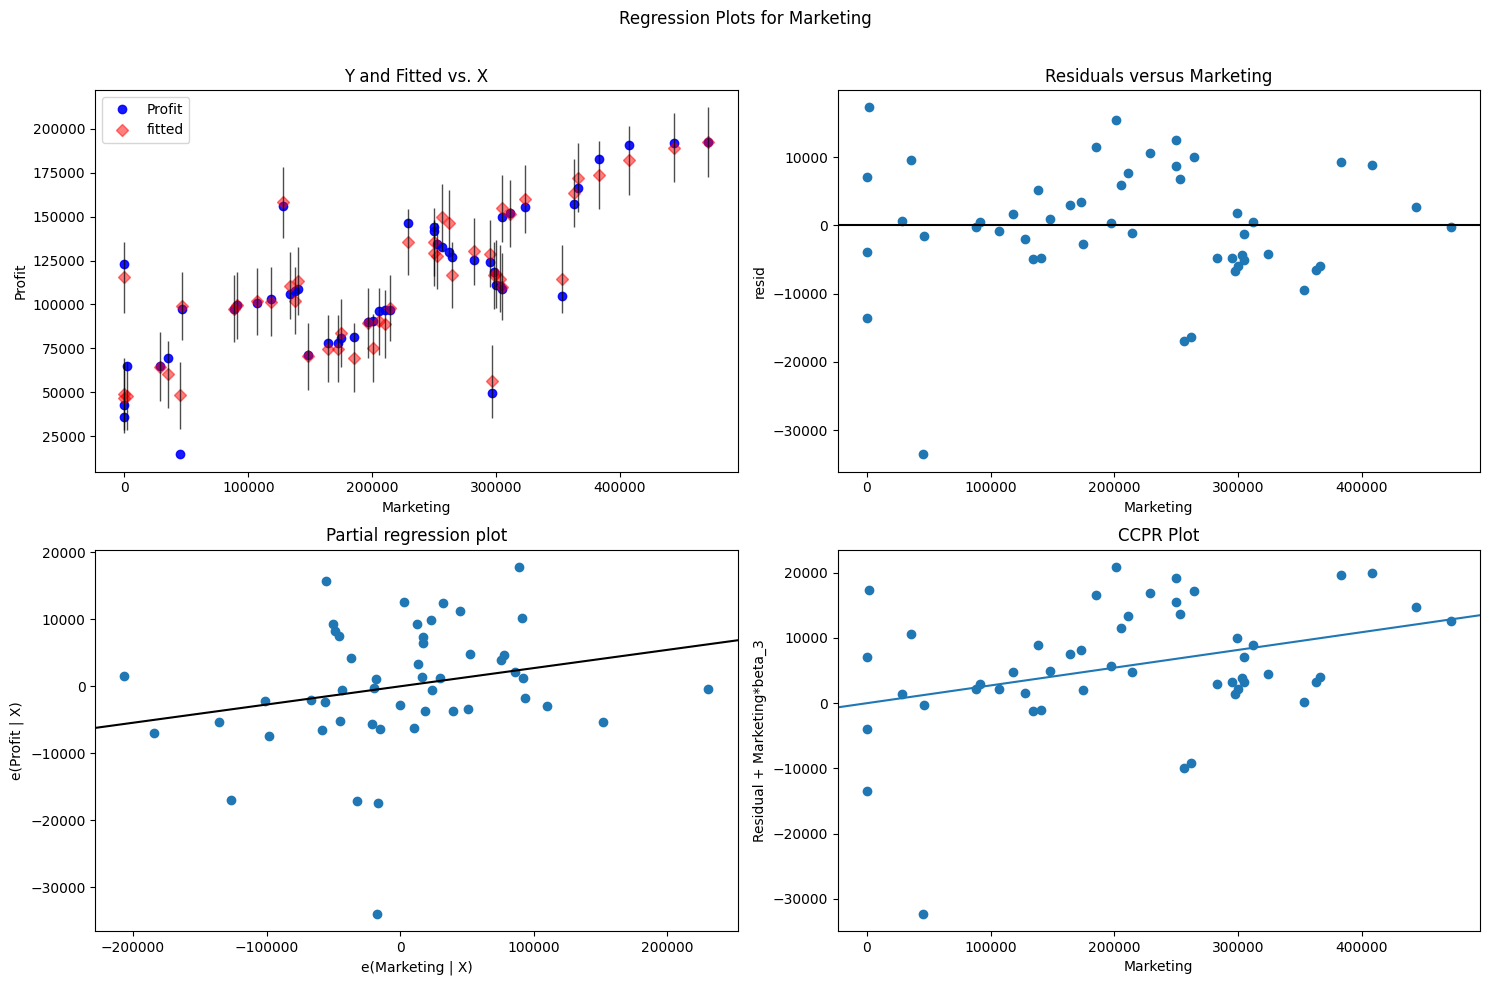

In [36]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model,"Marketing",fig=fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook’s Distance

In [37]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = Model.get_influence() # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance # we don't need p-value so we placed _ here. That is temporary place holder.

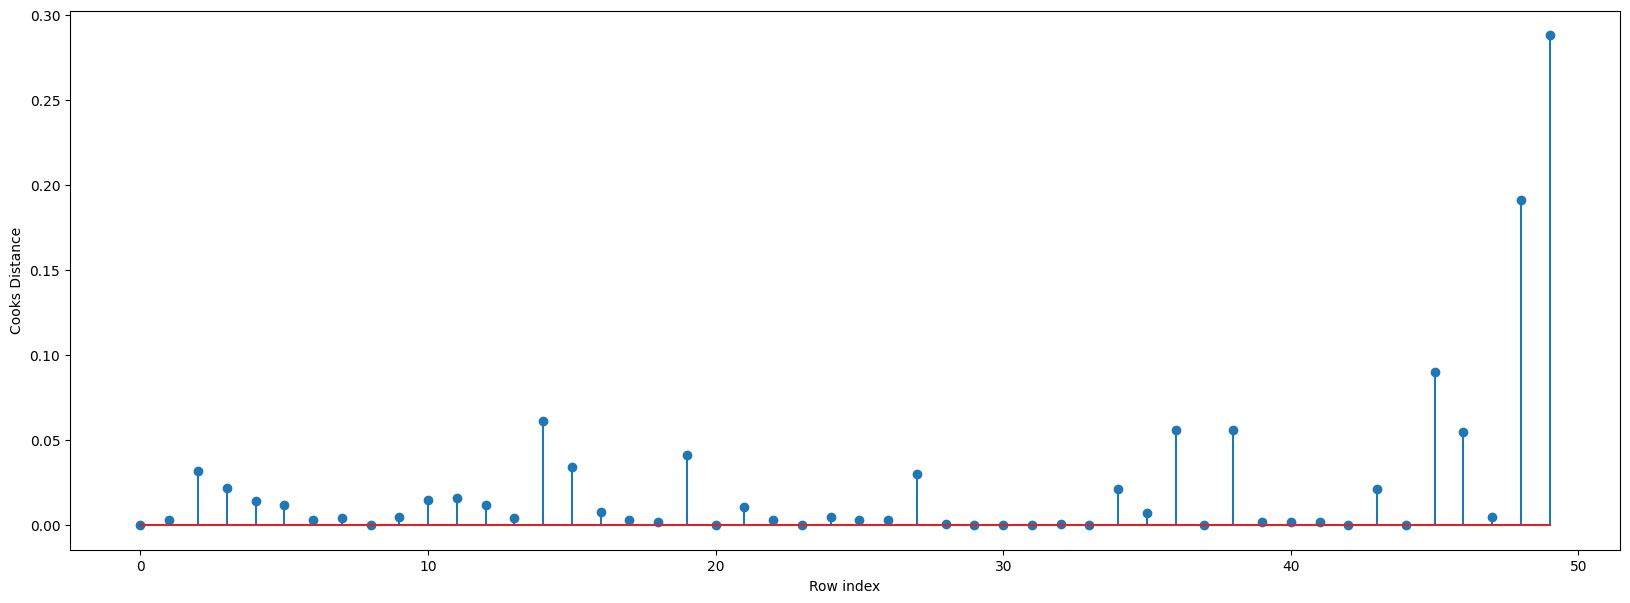

In [39]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3)) # index values of car on x-axis
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show() # all points having <1 cook's distance

In [43]:
df.shape

(50, 5)

In [44]:
k = df.shape[1] #k is no of variables as 5
n = df.shape[0] # no of data points as 50
leverage_cutoff = 3*((k + 1))/n
leverage_cutoff

0.36

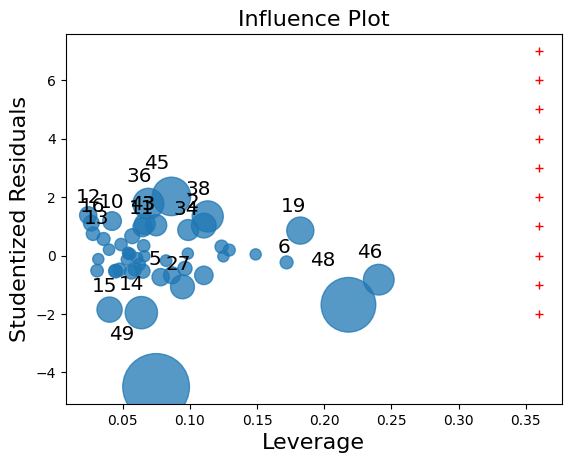

In [45]:

from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(Model,alpha=0.5)

y=[i for i in range(-2,8)]# -2 to 8: 10 values for printing + in red color
x=[leverage_cutoff for i in range(10)] # 10 values for printing + in red color
plt.plot(x,y,'r+')

plt.show()


In [46]:
df[df.index.isin([49])]

,RND,Admin,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [47]:
df.head()

,RND,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [48]:
#Load the data
df_new = pd.read_csv("/content/50_Startups.csv")

In [53]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[49,47]],axis=0).reset_index()

In [50]:
df1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [54]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [55]:
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [58]:
df1=df1.rename({'R&D Spend':'RND','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)


In [59]:
df1[df1.duplicated]

,RND,Admin,Marketing,State,Profit


Build the model on the new data

In [60]:
Model_P = smf.ols("Profit~RND+Admin+Marketing",data=df1).fit()

In [62]:
#Again check for influencers
df1.shape

(48, 5)

In [63]:
k = df1.shape[1] #k is no of variables as 5
n = df1.shape[0] # no of data points as 48
leverage = 3*((k + 1))/n
leverage


0.375

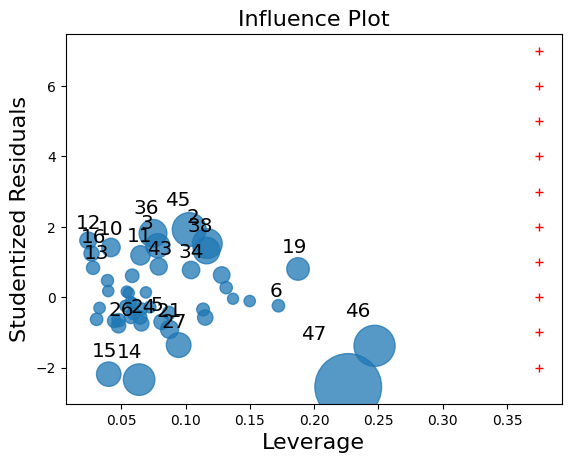

In [64]:
influence_plot(Model_P,alpha=0.5)

y=[i for i in range(-2,8)]# -2 to 8: 10 values for printing + in red color
x=[leverage for i in range(10)] # 10 values for printing + in red color
plt.plot(x,y,'r+')

plt.show()

all values are between +2 to -2 near to 0

In [67]:
(Model_P.rsquared,Model_P.aic)

(0.9590028654650488, 999.9625338821044)

# compare with 1st model values. It was 0.9507, now it is 0.9590 and AIC value get least as compaire to previous.